In [1]:
# Loading Data

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [2]:

# Encoding / Vectorizing training and testing data

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# Encoding / Vectorizing training and testing labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [3]:
# Defining Model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



In [4]:
# Compilling Model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
            metrics=['accuracy'])

In [5]:
# Setting aside a Validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
# Training model

history = model.fit(partial_x_train,partial_y_train,epochs=20,
                batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 71ms/step - loss: 2.9392 - accuracy: 0.4812 - val_loss: 2.0362 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.6435 - accuracy: 0.6782 - val_loss: 1.4228 - val_accuracy: 0.6710
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1959 - accuracy: 0.7483 - val_loss: 1.1973 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.9621 - accuracy: 0.7970 - val_loss: 1.0693 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7934 - accuracy: 0.8279 - val_loss: 1.0128 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6600 - accuracy: 0.8598 - val_loss: 0.9477 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5496 - accuracy: 0.8862 - val_loss: 0.9045 - val_accuracy: 0.8100
Epoch 8/20
16

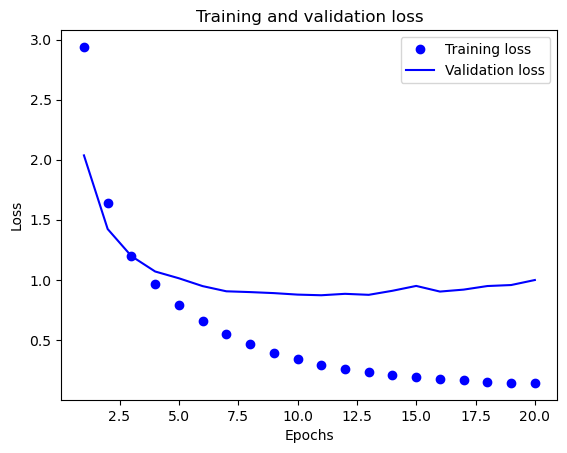

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

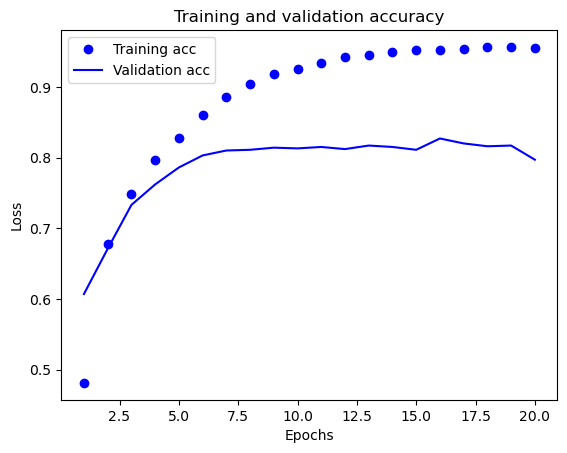

In [9]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()